
✅ Tenure-based Statistics:
   Tenure Category  Avg Monthly Charges  Median Charges  Max Charges  \
0     0-12 months            56.097781          55.900       112.95   
1    13-36 months            63.248195          69.675       116.25   
2      37+ months            72.008730          80.300       118.75   

   Min Charges  Churn Rate (%)  
0        18.75       47.438243  
1        18.25       25.538793  
2        18.40       11.929357  


/tmp/ipython-input-2-2614165816.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='gender', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='pastel')
/tmp/ipython-input-2-2614165816.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='pastel')


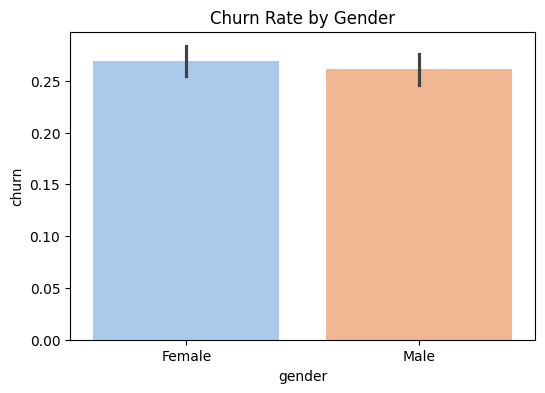

/tmp/ipython-input-2-2614165816.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='seniorcitizen', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='muted')
/tmp/ipython-input-2-2614165816.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seniorcitizen', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='muted')


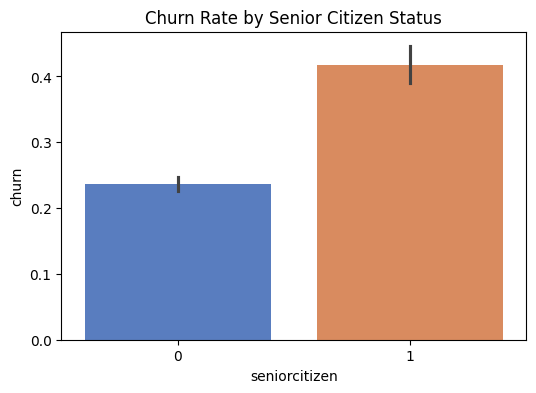

/tmp/ipython-input-2-2614165816.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='paymentmethod', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='Set2')
/tmp/ipython-input-2-2614165816.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='paymentmethod', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='Set2')


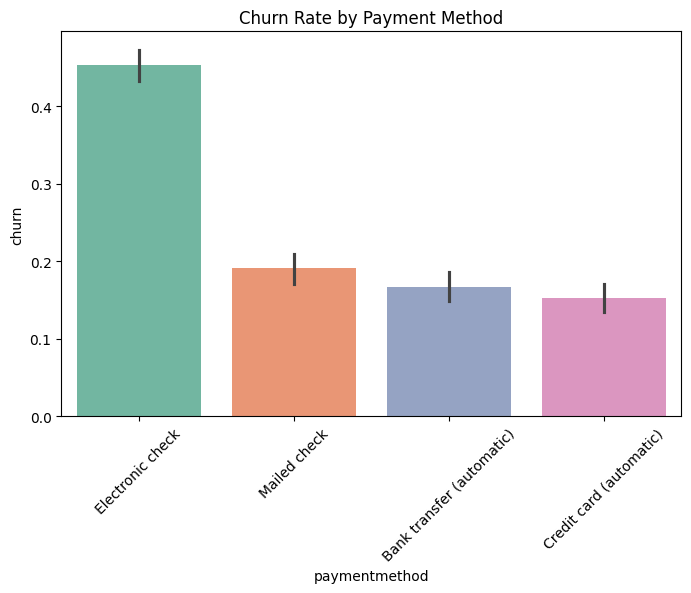

/tmp/ipython-input-2-2614165816.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='contract', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='coolwarm')
/tmp/ipython-input-2-2614165816.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contract', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='coolwarm')


In [2]:
# ----------------------------------------------------------
# 📌 Task 5: Advanced Analysis
# ----------------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load the dataset (only if running Task 5 separately)
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

# ✅ Create tenure category if not already done
def tenure_category(tenure):
    if tenure <= 12:
        return "0-12 months"
    elif tenure <= 36:
        return "13-36 months"
    else:
        return "37+ months"

df['tenure_category'] = df['tenure'].apply(tenure_category)

# ✅ Group by tenure - statistics
group_stats = df.groupby('tenure_category').agg({
    'monthlycharges': ['mean', 'median', 'max', 'min'],
    'churn': lambda x: (x.value_counts(normalize=True).get('Yes', 0) * 100)
}).reset_index()

group_stats.columns = ['Tenure Category', 'Avg Monthly Charges', 'Median Charges',
                       'Max Charges', 'Min Charges', 'Churn Rate (%)']

print("\n✅ Tenure-based Statistics:\n", group_stats)

# ✅ Churn by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='pastel')
plt.title("Churn Rate by Gender")
plt.show()

# ✅ Churn by Senior Citizen
plt.figure(figsize=(6, 4))
sns.barplot(x='seniorcitizen', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='muted')
plt.title("Churn Rate by Senior Citizen Status")
plt.show()

# ✅ Churn by Payment Method
plt.figure(figsize=(8, 5))
sns.barplot(x='paymentmethod', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='Set2')
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.show()

# ✅ Churn by Contract Type
plt.figure(figsize=(6, 4))
sns.barplot(x='contract', y='churn', data=df.replace({'Yes':1, 'No':0}), palette='coolwarm')
plt.title("Churn Rate by Contract Type")
plt.show()
